In [1]:
pip install -U pip

Requirement already up-to-date: pip in c:\conda\envs\dlc-cpu\lib\site-packages (20.2.4)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in c:\conda\envs\dlc-cpu\lib\site-packages (3.3.2)Note: you may need to restart the kernel to use updated packages.



C:\conda\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


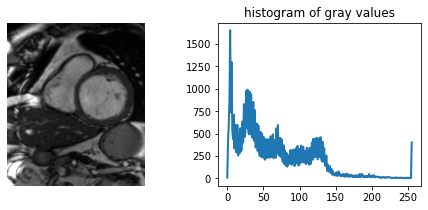

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color 
import skimage.io
from skimage import morphology
from skimage import segmentation
from skimage import measure
from skimage.filters import sobel
from skimage.exposure import histogram
from skimage.color import label2rgb
from scipy import ndimage as ndi
from skimage import metrics
from skimage.metrics import (adapted_rand_error,
                              variation_of_information,
                             hausdorff_distance
                            )
from skimage.feature import canny
from skimage.util import img_as_float

%matplotlib inline

# Iput Image
image = skimage.io.imread('MRI.png')
img = color.rgb2gray(image)

# Edge enhancement
edge_sobel = sobel(img)
img1 = edge_sobel

# Histogram of MRI image
hist,hist_centers = histogram(img)
fig, axes = plt.subplots(1,2, figsize =(8, 3))
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

# Initial Mask
mask_i = skimage.io.imread('InitialMask.png')

# GT
gt = skimage.io.imread('GT.png')
gt1 =sobel(gt)

Text(0.5, 1.0, 'histogram of gray values')

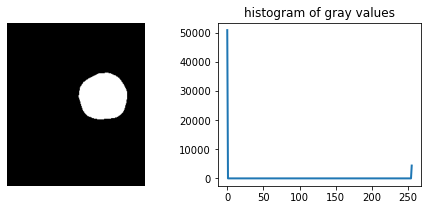

In [4]:
# Histogram of the ground truth image
hist,hist_centers = histogram(gt)
fig, axes = plt.subplots(1,2, figsize =(8, 3))
axes[0].imshow(gt, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram of gray values')

(-0.5, 215.5, 255.5, -0.5)

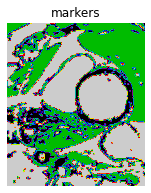

In [5]:
# Redefine foreground and background
# Define the range of gray values
markers = np.zeros_like(img)
markers[img < 30] = 1
markers[img > 50] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

(-0.5, 215.5, 255.5, -0.5)

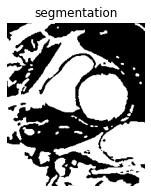

In [6]:
# Watershed Segmentation of gray scale image
segmentation_img = segmentation.watershed(img1, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_img, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

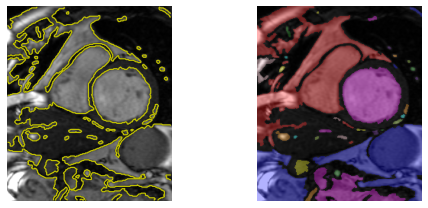

In [7]:
# Draw the contour and color
segmentation_img = ndi.binary_fill_holes(segmentation_img - 1)
labeled_img, _ = ndi.label(segmentation_img)
image_label_overlay = label2rgb(labeled_img, image=img, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].contour(segmentation_img, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay)

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()

(-0.5, 215.5, 255.5, -0.5)

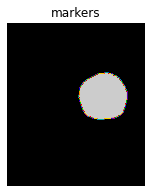

In [8]:
# Redefine foreground and background based on the ground truth
# Define the range of gray values
markers1 = np.zeros_like(img)
markers1[gt < 30] = 1
markers1[gt > 50] = 2

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers1, cmap=plt.cm.nipy_spectral)
ax.set_title('markers')
ax.axis('off')

(-0.5, 215.5, 255.5, -0.5)

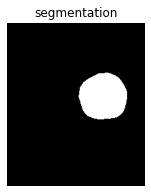

In [9]:
# Watershed based on the ground truth mask
segmentation_img1 = segmentation.watershed(img1, markers1)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation_img1, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

In [10]:
# Image based on ground truth 
im_true = segmentation_img1

(-0.5, 215.5, 255.5, -0.5)

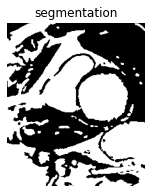

In [11]:
# Watershed test
im_test1 = segmentation.watershed(img1, markers, compactness=0.0001)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(im_test1, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')

In [12]:
# Hausdorff Distance between ground truth and image after watershed
hd1 = hausdorff_distance(gt1, im_true)
print(hd1)

# Hausdorff distance between watershed images after and before implemented ground truth
hd2 = hausdorff_distance(segmentation_img1, segmentation_img)
print(hd2)

164.83021567661677
31.0


(-0.5, 215.5, 255.5, -0.5)

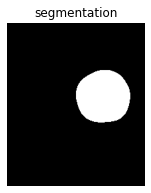

In [13]:
image = img_as_float(gt1)
gradient = segmentation.inverse_gaussian_gradient(image)
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
im_test2 = segmentation.morphological_geodesic_active_contour(gradient, iterations=1000,
                                                 init_level_set=init_ls,
                                                 smoothing=4, balloon=-1,
                                                 threshold=0.8)
im_test2 = measure.label(im_test2)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(im_test2, cmap=plt.cm.gray)
ax.set_title('segmentation')
ax.axis('off')


## Method: Compact watershed
Adapted Rand error: 0.3665676425976562
Adapted Rand precision: 0.503589822360502
Adapted Rand recall: 0.8534913808475798
False Splits: 0.9264106385991351
False Merges: 0.3324130565004541

## Method: Morphological Geodesic Active Contours
Adapted Rand error: 0.025216053041028363
Adapted Rand precision: 0.954629850487549
Adapted Rand recall: 0.9958073813513275
False Splits: 0.14738673914017678
False Merges: 0.07557020452420778


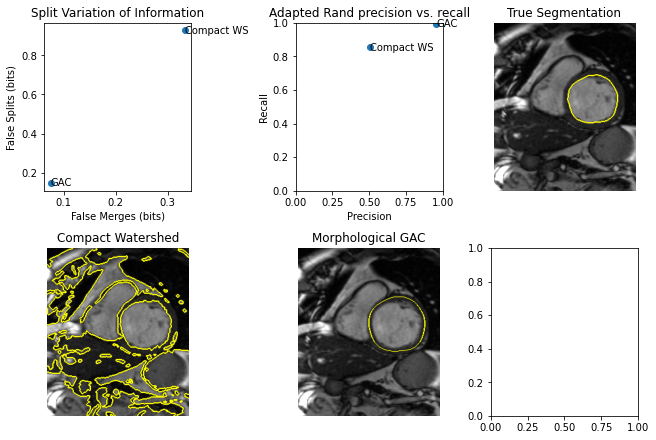

In [14]:
method_names = ['Compact watershed',
                'Morphological Geodesic Active Contours']
short_method_names = ['Compact WS', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []
for name, im_test in zip(method_names, [im_test1, im_test2]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error}")
    print(f"Adapted Rand precision: {precision}")
    print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

ax[0].scatter(merge_list, split_list)
for i, txt in enumerate(short_method_names):
    ax[0].annotate(txt, (merge_list[i], split_list[i]),
                   verticalalignment='center')
ax[0].set_xlabel('False Merges (bits)')
ax[0].set_ylabel('False Splits (bits)')
ax[0].set_title('Split Variation of Information')

ax[1].scatter(precision_list, recall_list)
for i, txt in enumerate(short_method_names):
    ax[1].annotate(txt, (precision_list[i], recall_list[i]),
                   verticalalignment='center')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Adapted Rand precision vs. recall')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

ax[2].imshow(segmentation.mark_boundaries(img, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(segmentation.mark_boundaries(img, im_test1))
ax[3].set_title('Compact Watershed')
ax[3].set_axis_off()

ax[4].imshow(segmentation.mark_boundaries(img, im_test2))
ax[4].set_title('Morphological GAC')
ax[4].set_axis_off()

plt.show()

In [16]:
# Hausdorff distance between GAC images and watershed imaged after implemented ground truth
hd3 = hausdorff_distance(im_true, im_test2)
print(hd3)

161.94134740701648
